In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import math

In [2]:
FILE_NUMBER = 13
FOLDER_NUMBER = 7554

In [3]:
def load_image_data():
    file_name = './data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)
    
    if not os.path.isfile(file_name + '.png'):
        print("Image not exits")
        return None
    
    if not os.path.isfile(file_name + '.csv'):
        print("Data not exits")
        return None
    
    return (pd.read_csv(file_name + '.csv'), file_name + '.png') 

In [4]:
(df, img) = load_image_data()
df.head(185)

,X,Y,Pressure,TiltX,TiltY,Time
0,713.411710359164,527.672941,0.290761,-4798.0,2043.0,00:13.4325736
1,713.780344150595,527.462294,0.295644,-4798.0,2043.0,00:13.4481964
2,714.780921584479,526.777688,0.295644,-4798.0,2043.0,00:13.4638099
3,716.782076452246,524.934519,0.208728,-4798.0,2043.0,00:13.4794442
4,717.098048273473,523.775956,0.208728,-4798.0,2043.0,00:13.4950665
...,...,...,...,...,...,...
180,647.584247603649,345.199215,0.241443,-3458.0,2600.0,00:16.5711085
181,644.266543480771,347.200370,0.243397,-3441.0,2627.0,00:16.5711085
182,643.002656195866,347.884975,0.243397,-3441.0,2627.0,00:16.5867320
183,639.526966162374,350.149440,0.245350,-3424.0,2655.0,00:16.5867320


In [5]:
def col_X_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
    
    if pd.isna(data_as_str):
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
    
    if re.search("^[a-zA-Z]", data_as_str) is not None:
        return defualt_value
    return float(data_as_str)


In [6]:
def col_Y_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
        
    if pd.isna(data_as_str):
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
        
    return float(data_as_str)



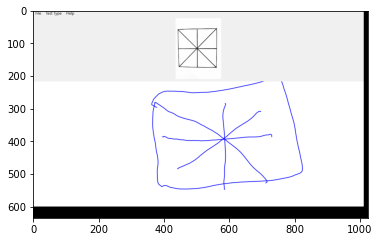

In [7]:
img1 = mpimg.imread('./data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)+".png")
plt.imshow(img1)

In [8]:
(float(df['X'][0]) + 0.2 * float(df[' Pressure'][0]))
(float(df['X'][2])) - (float(df['X'][1]))

1.0005774338839046

In [9]:
df[' Time'][0]
def to_number(date_as_str, defualt_value):
    if not date_as_str:
        return defualt_value

    if pd.isna(date_as_str):
        return defualt_value
    
    
    if type(date_as_str) == float:
        return date_as_str
    
    (p1, p2) = date_as_str.split(':')
    p1 = float(p1)
    p2 = float(p2)
    return p1 * 60 + p2

In [10]:
df["Time"] = df[" Time"]
df["Time"][0] = to_number(df["Time"][0], 0)
df["Y"] = df[" Y"]
df["Pressure"] = df[" Pressure"]
df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
df["Pressure"][0] = col_Y_ToNum(df["Pressure"][0], 0)
df["X"][0] = col_X_ToNum(df["X"][0], 0)

flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["Time"][index] = to_number(df["Time"][index], df["Time"][index - 1])
        df["Y"][index] = col_Y_ToNum(df["Y"][index], df["Y"][index - 1])
        df["Pressure"][index] = col_Y_ToNum(df["Pressure"][index], df["Pressure"][index - 1])
        df["X"][index] = col_X_ToNum(df["X"][index], df["X"][index - 1])

df["X"]

/var/folders/dq/qdd4tr0j5v1ctgxtptm2v5_h0000gn/T/ipykernel_3195/3679598216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"][0] = to_number(df["Time"][0], 0)
/var/folders/dq/qdd4tr0j5v1ctgxtptm2v5_h0000gn/T/ipykernel_3195/3679598216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
/var/folders/dq/qdd4tr0j5v1ctgxtptm2v5_h0000gn/T/ipykernel_3195/3679598216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

0        713.41171
1       713.780344
2       714.780922
3       716.782076
4       717.098048
           ...    
1200    372.583439
1201    376.480425
1202    377.849636
1203    377.849636
1204    377.849636
Name: X, Length: 1205, dtype: object

In [11]:
df["Y"]

0       527.672941
1       527.462294
2       526.777688
3       524.934519
4       523.775956
           ...    
1200    294.064442
1201    296.118258
1202    296.750202
1203    296.750202
1204    296.750202
Name: Y, Length: 1205, dtype: float64

In [12]:
df["Time"]

0       13.432574
1       13.448196
2        13.46381
3       13.479444
4       13.495067
          ...    
1200     35.40898
1201     35.40898
1202     35.40898
1203     35.40898
1204     35.40898
Name: Time, Length: 1205, dtype: object

In [13]:
df["Pressure"]

0       0.290761
1       0.295644
2       0.295644
3       0.208728
4       0.208728
          ...   
1200    0.667231
1201    0.608392
1202    0.558099
1203    0.558099
1204    0.558099
Name: Pressure, Length: 1205, dtype: float64

/var/folders/dq/qdd4tr0j5v1ctgxtptm2v5_h0000gn/T/ipykernel_3195/2845424429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][0] = 0
/var/folders/dq/qdd4tr0j5v1ctgxtptm2v5_h0000gn/T/ipykernel_3195/2845424429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]


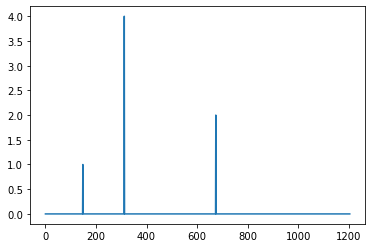

In [14]:
df["TimeDiff"] = np.full(len(df.index), 0)
df["TimeDiff"][0] = 0
flag_first = True
for index in df.index:
    if flag_first:
        flag_first = False
    else:
        df["TimeDiff"][index] = df["Time"][index] - df["Time"][index - 1]
        

plt.plot(df["TimeDiff"])

## Q.1.

Counting lines

* First try using slopes

In [15]:
def calculate_slope(df, up_i):
    if (df['X'][up_i]-df['X'][0]) == 0:
        slp = 0
    else:
        slp = (df['Y'][up_i]-df['Y'][0])/(df['X'][up_i]-df['X'][0])
    return slp

In [16]:
UP_I = 5

def lines_cords(df):
    slp = calculate_slope(df, UP_I)
    lines = []
    prev = 0
    i = 0
    current_slp = slp
    while (i+UP_I)<len(df):
        if (df['Y'][i]!= df['Y'][i+UP_I]) & (df['X'][i]!= df['X'][i+UP_I]):
            current_slp = (df['Y'][i+UP_I]-df['Y'][i])/(df['X'][i+UP_I]-df['X'][i])    
        if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
            slp = current_slp
        else:
            if i-prev>60:
                lines.append({ 'start' : prev, 'end' : i })
                prev = i                    
        slp = current_slp
        i+=1
    
    return lines

In [17]:
lines = lines_cords(df)
print("number of lines: ",len(lines))

number of lines:  10


* Second try using time difference

In [18]:
# def Count_lines_time(df):
#     if (df['X'][1]-df['X'][0]) ==0:
#         slp = 0
#     else:
#         slp = (df['Y'][1]-df['Y'][0])/(df['X'][1]-df['X'][0])
    
#     numOfLines = 0
#     prev = 0
#     i = 0
#     current_slp = slp
#     while (i+1)<len(df):
#         if (df['Y'][i]!= df['Y'][i+1]) & (df['X'][i]!= df['X'][i+1]):
#             current_slp = (df['Y'][i+1]-df['Y'][i])/(df['X'][i+1]-df['X'][i])    
#         if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
#             slp = current_slp
#         else:
#             if i-prev>60:
#                 print("current_slp:   ", current_slp)
#                 print("slp:   ", slp)
#                 numOfLines +=1
#                 prev = i                    
#         slp = current_slp
#         i+=1
    
#     return numOfLines

## Q.2.

Compute the length of each line and the avarage pressure applied by clicking on each line

In [19]:
def avg_pressure(df, start, end):
    sum_pressures = 0
    for j in range(start, end):
        sum_pressures += float(df[" Pressure"][j])
    return sum_pressures/(end - start)


In [20]:
def Lengths_of_lines(df):
    for i in lines:
        start = i['start']
        end = i['end']
        avg_pressure_data = avg_pressure(df, start, end)
        dist = math.dist([df['X'][start] , df['Y'][start]],[df['X'][end], df['Y'][end]])
        print("Length is " , dist , ", Avarage pressure is " , avg_pressure_data )
        print('-------------------')


In [21]:
Lengths_of_lines(df)

Length is  218.20825901886923 , Avarage pressure is  0.59062106172378
-------------------
Length is  84.38639947021848 , Avarage pressure is  0.2781604353065898
-------------------
Length is  329.19012738995343 , Avarage pressure is  0.45774527726009717
-------------------
Length is  212.1997083141989 , Avarage pressure is  0.5513618728145958
-------------------
Length is  185.3702548057863 , Avarage pressure is  0.49241189683069947
-------------------
Length is  277.0611566140725 , Avarage pressure is  0.4701879779879864
-------------------
Length is  161.59923431575524 , Avarage pressure is  0.5908020695701974
-------------------
Length is  440.3590453228003 , Avarage pressure is  0.7116802481550667
-------------------
Length is  280.48406047484826 , Avarage pressure is  0.7503297270183832
-------------------
Length is  402.17592207869893 , Avarage pressure is  0.7404157839439534
-------------------


<AxesSubplot:>

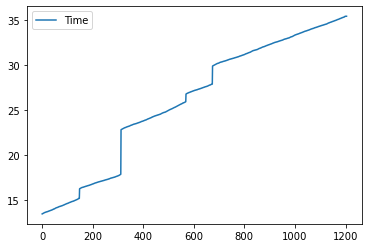

In [22]:
pd.DataFrame({ 'Time':df['Time']}).plot()

## Q.3.

Count how many hand lifts were in the drawing

<AxesSubplot:>

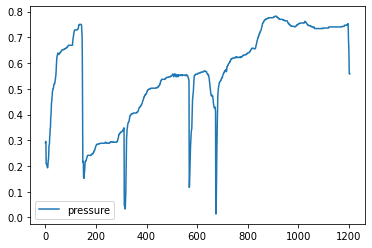

In [23]:
pd.DataFrame({ 'pressure':df['Pressure']}).plot()

In [24]:
MIN_PRESSURE = 0.16
# math.min(df['Pressure'])
def FindPressure(df):
    lifts = 0
    prev_lift = False
    i = 2
    while (i)<len(df):
        if (df['Pressure'][i] <= MIN_PRESSURE) :
            prev_lift = True
        else:
            if prev_lift:
                lifts+=1
                prev_lift = False
        i+=1
    
    return lifts

In [25]:
print("There are ",FindPressure(df)," hands lifts")

There are  4  hands lifts


## Q.4.

(bonus)
4. לבדוק האם הצורה פתוחה או סגורה )בונוס - רק לגבי צורות מסוימות(

In [26]:
def IsOpen(df):
    eps = 10
    isClosed = False
    for i in range(len(df)):
        start_x = df["X"][i]
        start_y = df["Y"][i]
        j=i
        while (j<len(df)):
            curr_x = df["X"][j]
            curr_y = df["Y"][j]
            if ((math.dist([start_x , start_y] , [curr_x, curr_y]) < eps) & 
                (df["Time"][j] - df["Time"][i] > 0.8)):
                isClosed = True
                print("The shape is closed")
                break
            j+=1
        if(isClosed):
            break

In [27]:
IsOpen(df)

The shape is closed
